## Linear Regression and Related Concepts

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_leverage_resid2
%matplotlib inline

### Formatting

In [2]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option("precision", 2)
pd.set_option("max_rows", 150)
sns.set_style('whitegrid')

### Check out the Data

In [3]:
# 1. GDP per capita table formation

GDPPerCapita = pd.read_excel('GDP_percapita.xls')
GDPPerCapita.dropna(how = "any", inplace = True)
GDPPerCapita.rename(columns={'Country Name':'Country', '2017': '2017 GDP per Capita'}, inplace=True)
GDPPerCapita.head(10)

,Country,2017 GDP per Capita
0,Aruba,25630.27
1,Afghanistan,556.30
2,Angola,4095.81
3,Albania,4532.89
4,Andorra,39134.39
5,Arab World,6284.74
6,United Arab Emirates,40325.38
7,Argentina,14591.86
8,Armenia,3914.50
9,American Samoa,11398.78


In [4]:
GDPPerCapita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 263
Data columns (total 2 columns):
Country                246 non-null object
2017 GDP per Capita    246 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
# 2. Rule of Law Index table formation 

RuleOfLaw = pd.read_excel('ROL_Historical.xlsx', sheet_name='WJP ROL Index 2017-2018 Scores')
RuleOfLaw = RuleOfLaw.transpose()
RuleOfLaw=RuleOfLaw.iloc[:,3]
RuleOfLaw = RuleOfLaw.to_frame()
RuleOfLaw.drop('Country', inplace=True)
RuleOfLaw.reset_index(drop = False, inplace = True)
RuleOfLaw.rename(columns={'index':'Country', 3: '2017 Rule of Law Index'}, inplace=True)
RuleOfLaw.head(10)

,Country,2017 Rule of Law Index
0,Afghanistan,0.34
1,Albania,0.51
2,Antigua and Barbuda,0.63
3,Argentina,0.58
4,Australia,0.81
5,Austria,0.81
6,Bahamas,0.6
7,Bangladesh,0.41
8,Barbados,0.65
9,Belarus,0.51


In [6]:
RuleOfLaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
Country                   113 non-null object
2017 Rule of Law Index    113 non-null object
dtypes: object(2)
memory usage: 1.9+ KB


In [7]:
# 3. Human Development Index table formation 

HDI = pd.read_excel('HDI.xlsx', sheet_name='HDI Data')
HDI['Country'].replace(' ', '', inplace=True)
HDI.head(10)

,Country,2017 HDI Score
0,Afghanistan,0.50
1,Albania,0.79
2,Algeria,0.75
3,Andorra,0.86
4,Angola,0.58
5,Antigua and Barbuda,0.78
6,Argentina,0.82
7,Armenia,0.76
8,Australia,0.94
9,Austria,0.91


In [8]:
HDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 2 columns):
Country           189 non-null object
2017 HDI Score    189 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [9]:
# FIRST simple regression data: Rule of Index vs. GDP per capita

ROL_GDP = GDPPerCapita.merge(RuleOfLaw, how = "inner", on = "Country", suffixes = ["2017 GDP per Capita", "2017 Rule of Law Index"])

In [10]:
ROL_GDP['2017 GDP per Capita'] = ROL_GDP['2017 GDP per Capita'].astype('float')
ROL_GDP['2017 GDP per Capita'] = np.sqrt(ROL_GDP['2017 GDP per Capita'])

In [13]:
ROL_GDP.head(10)

,Country,2017 GDP per Capita,2017 Rule of Law Index
0,Afghanistan,23.59,0.34
1,Albania,67.33,0.51
2,United Arab Emirates,200.81,0.65
3,Argentina,120.80,0.58
4,Antigua and Barbuda,125.80,0.63
5,Australia,232.58,0.81
6,Austria,217.67,0.81
7,Belgium,208.58,0.77
8,Burkina Faso,25.34,0.51
9,Bangladesh,39.55,0.41


In [14]:
ROL_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 3 columns):
Country                   105 non-null object
2017 GDP per Capita       105 non-null float64
2017 Rule of Law Index    105 non-null object
dtypes: float64(1), object(2)
memory usage: 3.3+ KB


In [15]:
ROL_GDP.describe()

,2017 GDP per Capita
count,105.00
mean,101.26
std,65.13
min,18.89
25%,49.32
50%,81.86
75%,128.21
max,275.14


In [16]:
# SECOND simple regression data: Rule of Index vs. Human Development Index

ROL_HDI = pd.read_excel('ROL_HDI.xlsx', sheet_name='HDI Data')
ROL_HDI.dropna(how = "any", inplace = True)
ROL_HDI.head(10)

,Country,2017 HDI,2017 Rule of Law Index
0,Afghanistan,0.50,0.34
1,Albania,0.79,0.51
5,Antigua and Barbuda,0.78,0.63
6,Argentina,0.82,0.58
8,Australia,0.94,0.81
9,Austria,0.91,0.81
11,Bahamas,0.81,0.60
13,Bangladesh,0.61,0.41
14,Barbados,0.80,0.65
15,Belarus,0.81,0.51


In [17]:
ROL_HDI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 188
Data columns (total 3 columns):
Country                   109 non-null object
2017 HDI                  109 non-null float64
2017 Rule of Law Index    109 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB


In [18]:
ROL_HDI['2017 Rule of Law Index'] = ROL_HDI['2017 Rule of Law Index'].astype('float')
ROL_HDI['2017 Rule of Law Index'] = ROL_HDI['2017 Rule of Law Index']**2

In [19]:
ROL_HDI.head(10)

,Country,2017 HDI,2017 Rule of Law Index
0,Afghanistan,0.50,0.12
1,Albania,0.79,0.26
5,Antigua and Barbuda,0.78,0.39
6,Argentina,0.82,0.34
8,Australia,0.94,0.65
9,Austria,0.91,0.66
11,Bahamas,0.81,0.36
13,Bangladesh,0.61,0.17
14,Barbados,0.80,0.42
15,Belarus,0.81,0.26


### EDA

__GDP-ROL__

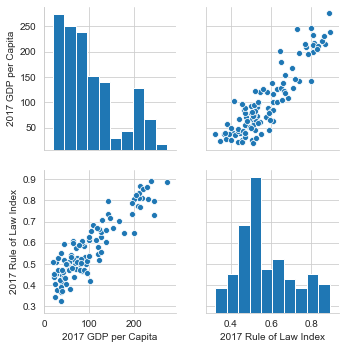

In [23]:
sns.pairplot(ROL_GDP)
plt.show()

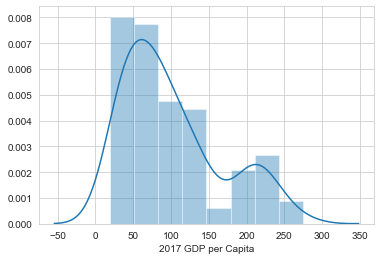

In [24]:
sns.distplot(ROL_GDP['2017 GDP per Capita'])
plt.show()

__HDI-ROL__

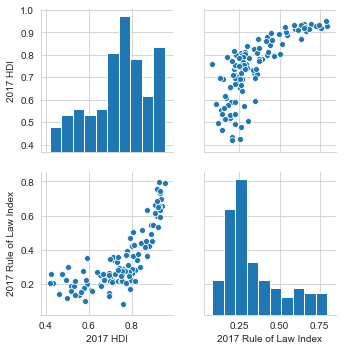

In [25]:
sns.pairplot(ROL_HDI)
plt.show()

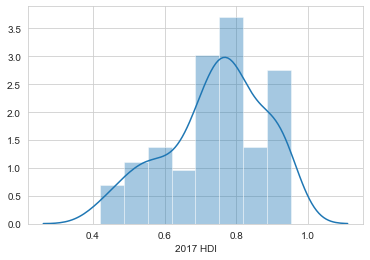

In [26]:
sns.distplot(ROL_HDI['2017 HDI'])
plt.show()

### Training a Linear Regression Model

In [27]:
X_GDP = ROL_GDP[['2017 Rule of Law Index']]
y_GDP = ROL_GDP[['2017 GDP per Capita']]

In [28]:
X_HDI = ROL_HDI[['2017 Rule of Law Index']]
y_HDI = ROL_HDI[['2017 HDI']]

## 1. sklearn modeling 

### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_GDP_train, X_GDP_test, y_GDP_train, y_GDP_test = train_test_split(X_GDP, y_GDP, test_size=0.30, random_state=101)

In [31]:
X_HDI_train, X_HDI_test, y_HDI_train, y_HDI_test = train_test_split(X_HDI, y_HDI, test_size=0.30, random_state=101)

### Creating and Training the Model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm_GDP = LinearRegression()
lm_HDI = LinearRegression()

In [34]:
lm_GDP.fit(X_GDP_train, y_GDP_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lm_HDI.fit(X_HDI_train, y_HDI_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print('intercept: ', lm_GDP.intercept_)
print('coefficients: ', lm_GDP.coef_)

intercept:  [-137.25139924]
coefficients:  [[420.20974445]]


In [37]:
print('intercept: ', lm_HDI.intercept_)
print('coefficients: ', lm_HDI.coef_)

intercept:  [0.54360047]
coefficients:  [[0.57369486]]


In [38]:
coeff_GDP = pd.DataFrame(lm_GDP.coef_,X_GDP.columns,columns=['Coefficient'])
coeff_GDP

,Coefficient
2017 Rule of Law Index,420.21


In [39]:
coeff_HDI = pd.DataFrame(lm_HDI.coef_,X_HDI.columns,columns=['Coefficient'])
coeff_HDI

,Coefficient
2017 Rule of Law Index,0.57


### Predictions from our Model

In [40]:
predictions_GDP = lm_GDP.predict(X_GDP_test)
predictions_HDI = lm_HDI.predict(X_HDI_test)

In [41]:
predictions_GDP

array([[118.92354874],
       [ 76.12935992],
       [ 73.18258002],
       [ 50.6409987 ],
       [ 59.86176881],
       [ 79.94623043],
       [ 47.2742159 ],
       [119.50783601],
       [ 53.08980484],
       [197.40308874],
       [204.72412067],
       [ 74.76465561],
       [ 93.72443232],
       [135.88686503],
       [113.47759655],
       [157.97770331],
       [225.54418135],
       [ 23.35556816],
       [172.67414454],
       [185.51564499],
       [ 60.47523524],
       [107.27006821],
       [104.91194435],
       [ 55.77729294],
       [ 72.61974367],
       [ 80.3139174 ],
       [109.85978303],
       [ 96.84550236],
       [134.37421914],
       [ 61.96680132],
       [ 46.27714912],
       [144.57821624]])

In [42]:
predictions_HDI

array([[0.90701402],
       [0.75779129],
       [0.85004876],
       [0.61859795],
       [0.6233162 ],
       [0.70576833],
       [0.69153148],
       [0.67330065],
       [0.71451803],
       [0.69739045],
       [0.67051199],
       [0.6951084 ],
       [0.70409785],
       [0.63631861],
       [0.69326725],
       [0.66184849],
       [0.63660205],
       [0.79770938],
       [0.65182391],
       [0.75154496],
       [0.69148645],
       [0.64524976],
       [0.70378485],
       [0.73850022],
       [0.74784848],
       [0.71693368],
       [0.7010136 ],
       [0.89786151],
       [0.73786016],
       [0.66983056],
       [0.88207585],
       [0.6542277 ],
       [0.67229113]])

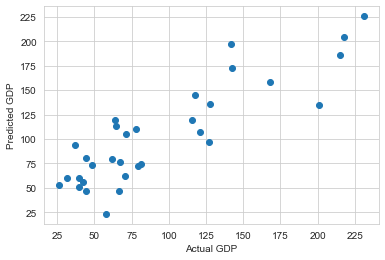

In [44]:
plt.scatter(y_GDP_test,predictions_GDP)
plt.xlabel("Actual GDP")
plt.ylabel("Predicted GDP")
plt.show()

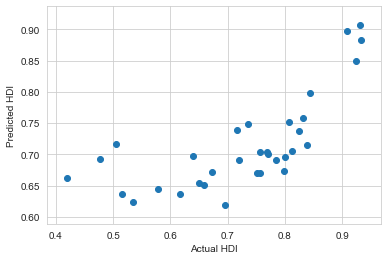

In [45]:
plt.scatter(y_HDI_test,predictions_HDI)
plt.xlabel("Actual HDI")
plt.ylabel("Predicted HDI")
plt.show()

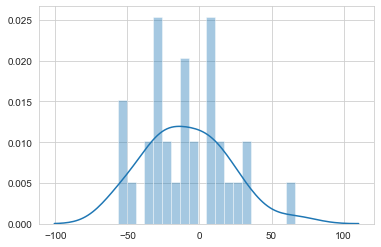

In [46]:
sns.distplot((y_GDP_test-predictions_GDP),bins=20);

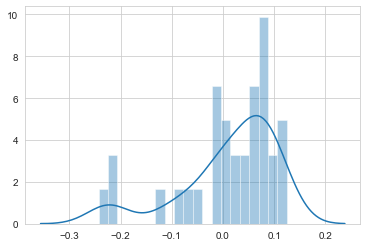

In [48]:
sns.distplot((y_HDI_test-predictions_HDI),bins=20);

### Regression Evaluation Metrics

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_GDP_test, predictions_GDP))
print('MSE:', metrics.mean_squared_error(y_GDP_test, predictions_GDP))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_GDP_test, predictions_GDP)))
print('R2:', metrics.explained_variance_score(y_GDP_test, predictions_GDP))

MAE: 24.45004760573715
MSE: 890.0200108323656
RMSE: 29.833203160779863
R2: 0.7631108681608503


In [51]:
print('MAE:', metrics.mean_absolute_error(y_HDI_test, predictions_HDI))
print('MSE:', metrics.mean_squared_error(y_HDI_test, predictions_HDI))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_HDI_test, predictions_HDI)))
print('R2:', metrics.explained_variance_score(y_HDI_test, predictions_HDI))

MAE: 0.07592466693253896
MSE: 0.009195912619977575
RMSE: 0.09589532115790413
R2: 0.48509106662400137


## 2. statsmodels modeling

### Modeling and Results

*__ROL_GDP__*

In [55]:
#X_GDP = sm.add_constant(X_GDP)

In [52]:
model_GDP = sm.OLS(y_GDP, X_GDP.astype(float))  
results_GDP = model_GDP.fit()

In [53]:
print(results_GDP.summary())

                                 OLS Regression Results                                 
Dep. Variable:     2017 GDP per Capita   R-squared (uncentered):                   0.870
Model:                             OLS   Adj. R-squared (uncentered):              0.869
Method:                  Least Squares   F-statistic:                              696.6
Date:                 Thu, 08 Jul 2021   Prob (F-statistic):                    6.78e-48
Time:                         19:59:47   Log-Likelihood:                         -544.73
No. Observations:                  105   AIC:                                      1091.
Df Residuals:                      104   BIC:                                      1094.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

*__ROL_HDI__*

In [54]:
#X_HDI = sm.add_constant(X_HDI)

In [56]:
model_HDI = sm.OLS(y_HDI, X_HDI.astype(float))  
results_HDI = model_HDI.fit()

In [57]:
print(results_HDI.summary())

                                 OLS Regression Results                                
Dep. Variable:               2017 HDI   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              793.7
Date:                Thu, 08 Jul 2021   Prob (F-statistic):                    1.39e-51
Time:                        20:00:07   Log-Likelihood:                         -8.2338
No. Observations:                 109   AIC:                                      18.47
Df Residuals:                     108   BIC:                                      21.16
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

*__ROL_GDP__*

In [58]:
influence_GDP = results_GDP.get_influence()

In [59]:
print('Parameters: ', results_GDP.params)
print('Standard errors: ', results_GDP.bse)
print('R2: ', results_GDP.rsquared)
print('n: ', results_GDP.nobs)

Parameters:  2017 Rule of Law Index    189.79
dtype: float64
Standard errors:  2017 Rule of Law Index    7.19
dtype: float64
R2:  0.87009057111428
n:  105.0


__Mean Standart Error__

*__ROL_GDP__*

In [60]:
print('TSS-RSS: ', results_GDP.mse_model)
print('RSS: ', results_GDP.mse_resid)
print('TSS: ', results_GDP.mse_total)
print('F: ', results_GDP.mse_model/results_GDP.mse_resid)

TSS-RSS:  1320550.9708897856
RSS:  1895.82410394575
TSS:  14454.444549525177
F:  696.5577492876806


__t values__

*__ROL_GDP__*

In [61]:
results_GDP.tvalues

2017 Rule of Law Index    26.39
dtype: float64

__RSS__

*__ROL_GDP__*

In [62]:
results_GDP.ssr

197165.706810358

In [63]:
sum(influence_GDP.resid_var)

197165.7068103581

__RSE__

*__ROL_GDP__*

In [64]:
# Simple regression

n = results_GDP.nobs
RSS = results_GDP.ssr
RSE = np.sqrt(RSS / (n-2))
print('RSE: ', RSE)

RSE:  43.75191610898155


__Skewness of residuals__

*__ROL_GDP__*

In [65]:
results_GDP.resid.skew()

0.8094915227484197

__Kurtosis of residuals__

*__ROL_GDP__*

In [66]:
results_GDP.resid.kurtosis()

-0.05548285901111871

__Jarque-Bera Test of residuals__

___Returns___

JBfloat or array: The Jarque-Bera test statistic<br>

JBpvfloat or array: The pvalue of the test statistic<br>

skewfloat or array: Estimated skewness of the data<br>

kurtosisfloat or array; Estimated kurtosis of the data<br>

*__ROL_GDP__*

In [67]:
jarque_bera(results_GDP.resid)

(11.193188837458314,
 0.0037104785601433403,
 0.7978811603047985,
 2.890520417564332)

### Predictions

*__ROL_GDP__*

In [68]:
predictions_2_GDP = results_GDP.predict(X_GDP)

__Predictions or Fitted Values__

*__ROL_GDP__*

In [69]:
predictions_2_GDP.head()

0         65
1         96
2    1.2e+02
3    1.1e+02
4    1.2e+02
dtype: object

In [70]:
results_GDP.fittedvalues.head()

0     65.39
1     96.37
2    122.68
3    110.44
4    119.05
dtype: float64

__Residuals__

*__ROL_GDP__*

In [71]:
results_GDP.resid.head()

0   -41.80
1   -29.05
2    78.13
3    10.36
4     6.74
dtype: float64

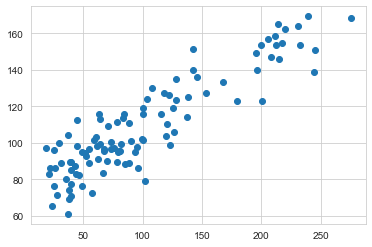

In [72]:
plt.scatter(y_GDP,predictions_2_GDP)

## Problems

### Correlation of error terms

__Durbin-Watson test__

*__ROL_GDP__*

In [73]:
dw = durbin_watson(results_GDP.resid)
dw

1.9642799910744897

In [74]:
def durbin_watson_test(dL=0, dU=0): # 5% level of significance
    if dw < dL:
        print('Autocorrelation exists')
    elif dw > dU:
        print('Autocorrelation does not exist')
    else:
        print('Test is inconclusive')

In [75]:
durbin_watson_test(1.21, 1.55)

Autocorrelation does not exist


### Heteroscedasticity

*__ROL_GDP__*

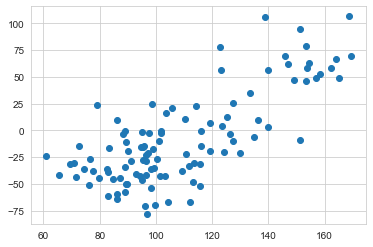

In [76]:
plt.scatter(predictions_2_GDP, results_GDP.resid);

In [77]:
heteroscedasticity_GDP = ROL_GDP
heteroscedasticity_GDP['Residuals'] = results_GDP.resid
heteroscedasticity_GDP.head()

,Country,2017 GDP per Capita,2017 Rule of Law Index,Residuals
0,Afghanistan,23.59,0.34,-41.80
1,Albania,67.33,0.51,-29.05
2,United Arab Emirates,200.81,0.65,78.13
3,Argentina,120.80,0.58,10.36
4,Antigua and Barbuda,125.80,0.63,6.74


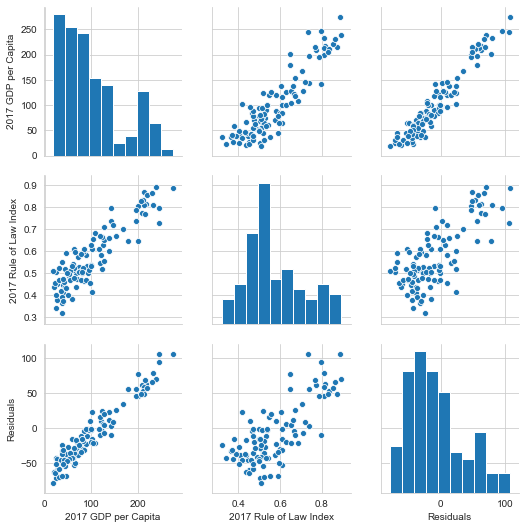

In [78]:
sns.pairplot(heteroscedasticity_GDP);

__Breush-Pagan test__<br>
*If the test statistic has a p-value below an appropriate threshold (e.g. p < 0.05) then the null hypothesis of homoskedasticity is rejected and heteroskedasticity assumed.*

*__ROL_GDP__*

In [79]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = het_breuschpagan(results_GDP.resid, results_GDP.model.exog)
lzip = zip(name, test)
for _ in lzip:
    print(_)

('Lagrange multiplier statistic', 51.792774519067365)
('p-value', nan)
('f-value', 101.23528339047287)
('f p-value', 4.9017845806521355e-17)


### Outliers, Leverage and Influence<br>

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

__Studentized residuals__

*__ROL_GDP__*

In [80]:
influence_GDP.resid_studentized

array([-0.96157494, -0.66950442,  1.8047149 ,  0.238971  ,  0.15566753,
        1.83378516,  1.46515767,  1.43123606, -1.63181315, -0.87691692,
       -0.23511526, -0.62103316, -0.49273532, -0.45093123, -0.33714579,
       -0.05698582,  0.1019797 , -0.50244359,  1.3586397 , -0.08515148,
       -0.02921226, -1.14821984, -0.72956351, -0.36209394, -0.49412111,
        0.06428166,  1.22713592, -0.69299165,  1.62407085, -0.07641635,
       -0.24050153,  0.8003058 , -0.20900197, -1.00939266,  1.13510906,
        1.31509943,  1.07849373, -1.20267604, -1.5522563 ,  0.53407972,
       -0.34724346, -0.37948595, -0.6368904 ,  1.6024684 , -0.62356104,
       -0.00644763,  0.36670741, -0.83343229, -1.23902638,  1.30001414,
       -0.88219502, -1.12346026,  1.08042053, -0.05774438, -1.04238088,
       -0.54805252,  0.29434341, -0.01132046, -1.37119586, -0.4418495 ,
       -0.81489436, -0.95463243, -0.9399073 , -1.41839214,  0.23130657,
       -1.02533252, -0.98285109, -1.79901372, -0.0235468 , -0.88

In [81]:
studentized_residuals_table_GDP = results_GDP.outlier_test()
studentized_residuals_table_GDP.head()

,student_resid,unadj_p,bonf(p)
0,-0.96,0.34,1.0
1,-0.67,0.51,1.0
2,1.82,0.07,1.0
3,0.24,0.81,1.0
4,0.15,0.88,1.0


In [82]:
studentized_residuals_GDP=studentized_residuals_table_GDP['student_resid']
studentized_residuals_GDP.head()

0   -0.96
1   -0.67
2    1.82
3    0.24
4    0.15
Name: student_resid, dtype: float64

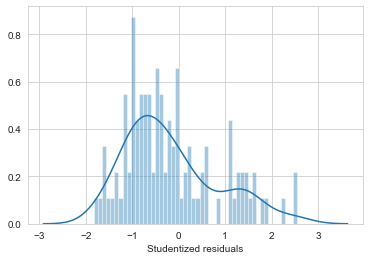

In [83]:
sns.distplot(studentized_residuals_GDP, axlabel='Studentized residuals', bins=50);

__Cook's distance__<br>
http://mpastell.com/2013/04/19/python_regression/<br>

*Outlier if greater than 1 or 4/n or 4/(n-p)*

*__ROL_GDP__*

In [84]:
#c is the distance and p is p-value

(c_GDP, p_GDP) = influence_GDP.cooks_distance
print(c_GDP)
print(p_GDP)

[3.00325306e-03 3.17501416e-03 3.75491176e-02 5.32374348e-04
 2.62918099e-04 6.10508650e-02 3.94947284e-02 3.39723407e-02
 1.87692590e-02 3.52648751e-03 4.29538518e-04 2.96577694e-03
 1.75256109e-03 1.25433137e-03 4.54737807e-04 2.57238044e-05
 1.21252177e-04 2.36125708e-03 3.36106334e-02 8.86742375e-05
 5.85445192e-06 8.01076704e-03 1.94906578e-03 9.12978170e-04
 3.15459056e-03 6.22363543e-05 2.91876477e-02 4.72261973e-03
 5.84925076e-02 3.46849084e-05 3.51139271e-04 8.74138526e-03
 7.69017339e-04 3.96833824e-03 2.71594941e-02 2.59938907e-02
 2.10722459e-02 1.48135330e-02 2.32215268e-02 2.84903886e-03
 1.23821376e-03 7.61478978e-04 2.81234064e-03 4.20016329e-02
 1.72697894e-03 4.27721228e-07 1.10175210e-03 5.09905990e-03
 1.13081234e-02 1.95993659e-02 7.11477294e-03 1.23772885e-02
 1.99986462e-02 2.41940569e-05 5.95811751e-03 8.50084165e-04
 1.04278140e-03 7.73783705e-07 1.05819297e-02 2.12170353e-03
 5.00749292e-03 6.47484194e-03 5.82254276e-03 1.04924699e-02
 3.03426747e-04 5.105661

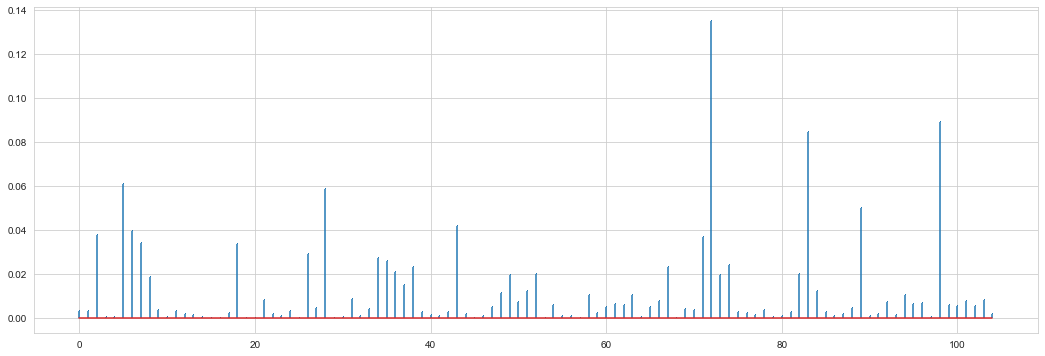

In [85]:
fig, ax = plt.subplots(figsize=(18,6))
plt.stem(np.arange(len(c_GDP)), c_GDP, markerfmt=",", use_line_collection=True, );

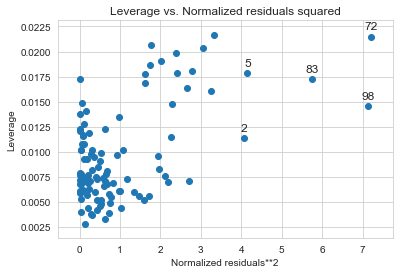

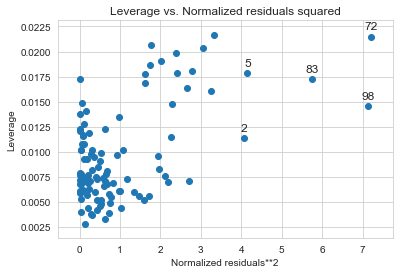

In [87]:
plot_leverage_resid2(results_GDP)

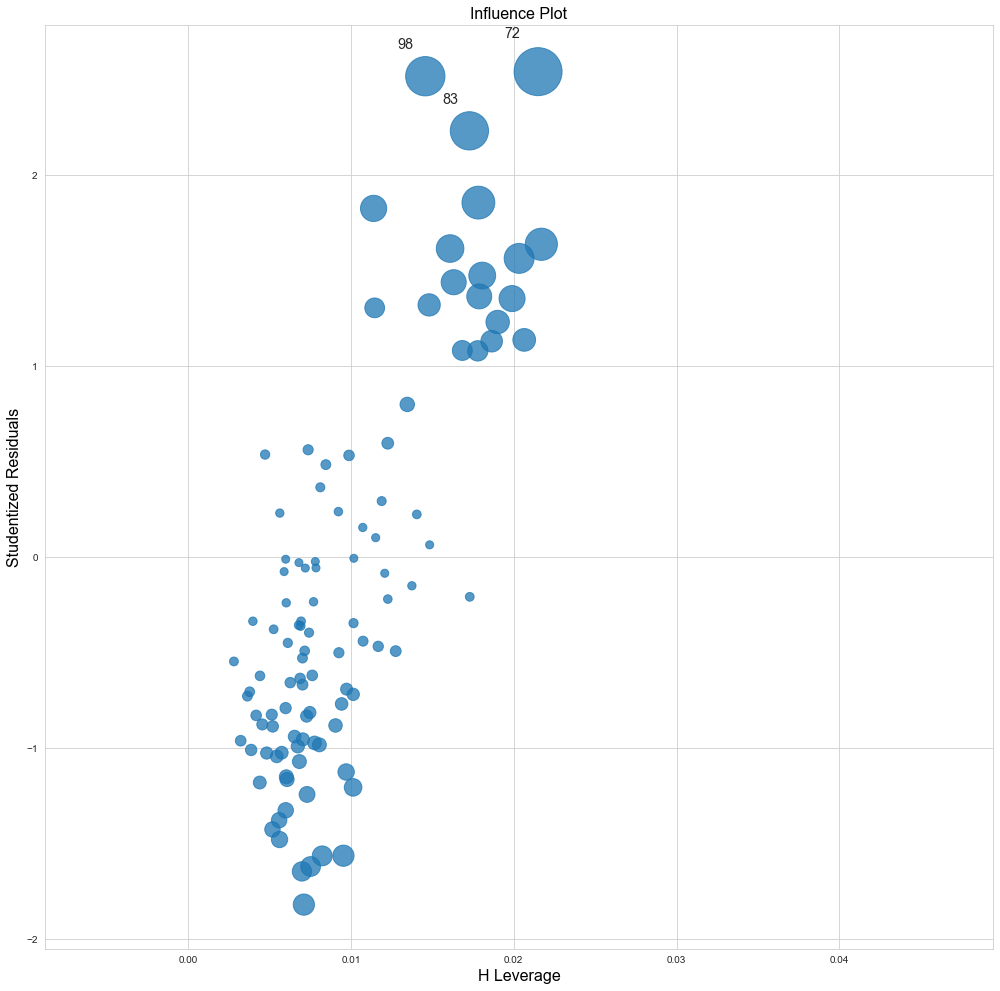

In [95]:
fig, ax = plt.subplots(figsize=(17,17))
fig = sm.graphics.influence_plot(results_GDP, alpha  = 0.05, ax = ax, criterion="cooks")

### Multicollinearity

__Condition number__<br>
*One way to assess multicollinearity is to compute the condition number. Values over 20 are worrisome*

*__ROL_GDP__*

In [96]:
np.linalg.cond(results_GDP.model.exog)

1.0

__Sorting__

In [97]:
RuleOfLaw = pd.read_excel('ROL_Historical.xlsx', sheet_name='WJP ROL Index 2014 Scores')
RuleOfLaw = RuleOfLaw.transpose()
RuleOfLaw=RuleOfLaw.iloc[:,3]
RuleOfLaw = RuleOfLaw.to_frame()
RuleOfLaw.drop('Country', inplace=True)
RuleOfLaw.reset_index(drop = False, inplace = True)
RuleOfLaw.rename(columns={'index':'Country', 3: 'Scores'}, inplace=True)
RuleOfLaw.head(10)

,Country,Scores
0,Afghanistan,0.34
1,Albania,0.49
2,Argentina,0.5
3,Australia,0.8
4,Austria,0.82
5,Bangladesh,0.39
6,Belarus,0.51
7,Belgium,0.76
8,Bolivia,0.39
9,Bosnia and Herzegovina,0.55
